<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [139]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [140]:
np.shape(movies) # 979 rows, 6 columns

(979, 6)

#### Check the data type of each column.

In [141]:
movies.info()
# star_rating = float64
#title = object
#content_rating = object
#genre = object
#duration = int64
#actors_list = object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [142]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [143]:
movies.sort_values(by='duration').head()
#shortest movie = Freaks

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [144]:
movies.sort_values(by='duration',ascending=False).head()
#longest movie = Hamlet

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([  9.,  44., 140., 194., 202., 164.,  92.,  48.,  37.,  21.,  13.,
          7.,   3.,   3.,   2.]),
 array([ 64.        ,  75.86666667,  87.73333333,  99.6       ,
        111.46666667, 123.33333333, 135.2       , 147.06666667,
        158.93333333, 170.8       , 182.66666667, 194.53333333,
        206.4       , 218.26666667, 230.13333333, 242.        ]),
 <a list of 15 Patch objects>)

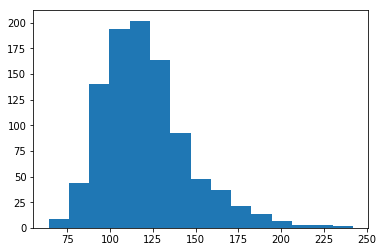

In [146]:
x = movies['duration']
plt.hist(x,bins=15)
# missed class on Tuesday,so not sure what the 
#"appropriate" method was discussed. I did some Googling
#and found multiple methods. the one I used for this was:
#did max-min: 242-64 = 178
# rouded 178 to 180 because 180 is a divisible number.
# chose "15" since 180 can be divided by 15
# the interval is 12

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x11ffab4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x11ffabcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ffa3ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x11ffb3588>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ffb39b0>],
 'means': []}

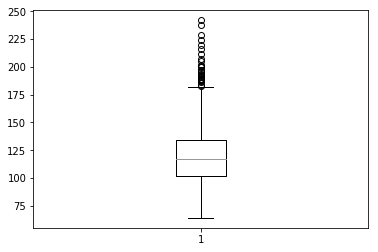

In [147]:
plt.boxplot(x)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [148]:
movies[['title','content_rating']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'num of movies')

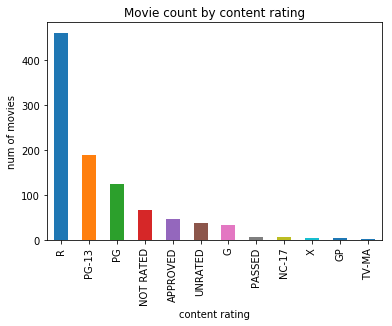

In [149]:
fig = movies['content_rating'].value_counts().plot(kind='bar',title="Movie count by content rating")

fig.set_xlabel("content rating")
fig.set_ylabel("num of movies")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [151]:
conditions = [
    (movies['content_rating'] == 'NOT RATED') | (movies['content_rating'] == 'APPROVED') | (movies['content_rating'] == 'PASSED') | (movies['content_rating'] == 'APPROVED') | (movies['content_rating'] == 'GP'),
    (movies['content_rating'] == 'X') | (movies['content_rating'] == 'TV-MA') 
]

results = ['UNRATED','NC-17']

movies['content_rating'] = np.select(conditions,results,movies['content_rating'])
movies[['title','content_rating']].groupby('content_rating').count()


,title
content_rating,
G,32
NC-17,12
PG,123
PG-13,189
R,460
UNRATED,160


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [152]:
# answer above

#### Count the number of missing values in each column.

In [153]:
movies.isnull().sum()
#only content rating has 3 null values

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [154]:
nulls = movies.isnull().any(axis=1)
movies[nulls]



,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [155]:
movies_clean = movies.fillna('UNRATED')
movies_clean.isnull().sum() # checked to make sure there are 0 nulls
movies_clean[['title','content_rating']].groupby('content_rating').count()
#checked to make sure "movies_clean" has 3 more UNRATED movies than "movies"

,title
content_rating,
G,32
NC-17,12
PG,123
PG-13,189
R,460
UNRATED,163


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [156]:
movies_clean['is_two_hours'] = movies_clean['duration'] >= 120

ratings_by_movie_duration = movies_clean[['is_two_hours','star_rating']].groupby('is_two_hours').mean()
ratings_by_movie_duration


,star_rating
is_two_hours,
False,7.838667
True,7.948899


#### Use a visualization to detect whether there is a relationship between duration and star rating.

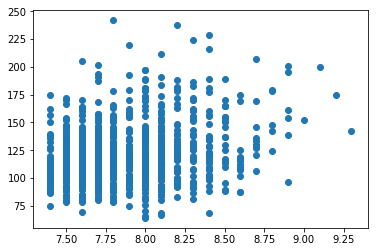

In [157]:
x = movies_clean['star_rating']
y = movies_clean['duration']

plt.scatter(x,y)
# no relationship

#### Calculate the average duration for each genre.

In [158]:
average_duration_by_genre = movies_clean[['genre','duration']].groupby('genre').mean()
average_duration_by_genre

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

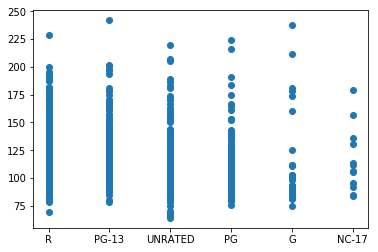

In [159]:
x = movies_clean['content_rating']
y = movies_clean['duration']

plt.scatter(x,y)
#no relationship

#### Determine the top rated movie (by star rating) for each genre.

In [177]:
movies_clean[['genre','title','star_rating']].sort_values('star_rating').groupby('genre').last()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,Fight Club,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [79]:
query = movies_clean.duplicated(subset = ['title'])
movie_duplicates = movies_clean[query]['title']

movies_clean[movies_clean['title'].isin(movie_duplicates)].sort_values(by='title')

# they are not actually duplicates, actors, genre, rating, etc. all are different

,star_rating,title,content_rating,genre,duration,actors_list,is_two_hours
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",False
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",True
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",False
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [63]:
movie_data_by_genre = movies_clean.groupby('genre')['star_rating'].agg(['count','median'])
movie_data_by_genre[movie_data_by_genre['count'] >= 10]

,count,median
genre,,
Action,136,7.8
Adventure,75,7.9
Animation,62,7.9
Biography,77,7.8
Comedy,156,7.8
Crime,124,7.8
Drama,278,7.9
Horror,29,7.7
Mystery,16,8.1


## Bonus

#### Figure out something "interesting" using the actors data!

In [313]:
#I got stuck trying to unpack the list of actors within each row :(

def clean(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",").replace("'","")

actors_per_movie = movies_clean['actors_list'].apply(clean)

actors_list = [actor for actor in actors_per_movie]

unique_actor_list = []

for actor in actors_list:
    if actor not in unique_actor_list:
        unique_actor_list.append(actor)
unique_actor_list[0]
    

'Tim Robbins, Morgan Freeman, Bob Gunton'

In [310]:
def clean(string):
    return string.replace("u'","'")

actors_per_movie = movies_clean['actors_list'].apply(clean)
actors_per_movie

actors_list = [actor for actor in actors_per_movie]
actors_list

["['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",
 "['Marlon Brando', 'Al Pacino', 'James Caan']",
 "['Al Pacino', 'Robert De Niro', 'Robert Duvall']",
 "['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']",
 "['John Travolta', 'Uma Thurman', 'Samuel L. Jackson']",
 "['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",
 "['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef']",
 "['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen']",
 "['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']",
 "['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']",
 "['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']",
 "['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page']",
 "['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",
 "['Tom Hanks', 'Robin Wright', 'Gary Sinise']",
 "['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen']",
 "['Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain']",
 "['Jack Nicholson', 'Louise Fletcher', 'Michael Berryman']",
 "['Toshir\\xf4 Mifune', 'Takashi Shimura', 'Keiko Tsush

In [315]:
def clean(string):
    return string.replace("u'","'")

actors_per_movie = movies_clean['actors_list'].apply(clean)
actors_per_movie

actors_list = [actor for actor in actors_per_movie]
actors_list

["['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",
 "['Marlon Brando', 'Al Pacino', 'James Caan']",
 "['Al Pacino', 'Robert De Niro', 'Robert Duvall']",
 "['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']",
 "['John Travolta', 'Uma Thurman', 'Samuel L. Jackson']",
 "['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",
 "['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef']",
 "['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen']",
 "['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']",
 "['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']",
 "['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']",
 "['Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Ellen Page']",
 "['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",
 "['Tom Hanks', 'Robin Wright', 'Gary Sinise']",
 "['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen']",
 "['Matthew McConaughey', 'Anne Hathaway', 'Jessica Chastain']",
 "['Jack Nicholson', 'Louise Fletcher', 'Michael Berryman']",
 "['Toshir\\xf4 Mifune', 'Takashi Shimura', 'Keiko Tsush